In the first stage, I want to build a single sequence prediction using lstm. So here my aim is that I want to predict the GDP of India using the past GDP of India. If the results are encouraging and time permits we can explore sectoral divisions also. I am probably going to use keras.


In [0]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.1.6


In [0]:
!pip install -q keras==2.2.2
!pip install git+https://www.github.com/keras-team/keras-contrib.git


tensorflow 1.12.0rc2 has requirement keras-applications>=1.0.6, but you'll have keras-applications 1.0.4 which is incompatible.
tensorflow 1.12.0rc2 has requirement keras-preprocessing>=1.0.5, but you'll have keras-preprocessing 1.0.2 which is incompatible.
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-e7fux1av
  Running setup.py bdist_wheel for keras-contrib ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-xqa5es4g/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [0]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM


from google.colab import files
files.upload()

Saving gdpdatafinal.csv to gdpdatafinal.csv


{'gdpdatafinal.csv': b'time,gdp\n1,3561.93\n2,3284.25\n3,4088.57\n4,4149.01\n5,3686.8\n6,3451.39\n7,4243\n8,4351.41\n9,3938.42\n10,3738.08\n11,4497.16\n12,4610.43\n13,4217.95\n14,3965.61\n15,4778.7\n16,4903.77\n17,4432.84\n18,4229.97\n19,4989.21\n20,4990.26\n21,4635.24\n22,4452.3\n23,5326.42\n24,5312.09\n25,4870.35\n26,4691.69\n27,5414.82\n28,5506.04\n29,5133.17\n30,5114.48\n31,6026.84\n32,5953.11\n33,5560.72\n34,5493.12\n35,6344.64\n36,6489.21\n37,6064.16\n38,5980.65\n39,6958.35\n40,7157.86\n41,6649.89\n42,6588.27\n43,7613.13\n44,7859.91\n45,7259.86\n46,7182.1\n47,8317.37\n48,8537.85\n49,7826.2\n50,7738.5\n51,8799.8\n52,9029.24\n53,8305.57\n54,8347.8\n'}

In [0]:
gdp_data = pd.read_csv("gdpdatafinal.csv")
gdp_data.head()



,time,gdp
0,1,3561.93
1,2,3284.25
2,3,4088.57
3,4,4149.01
4,5,3686.80


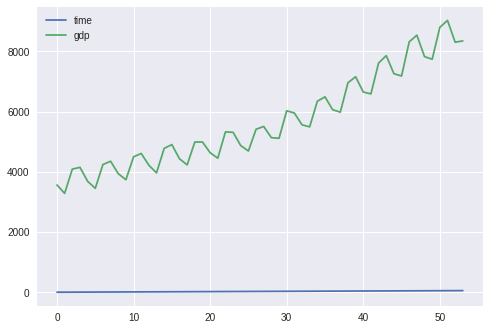

In [0]:
gdp_data.plot()
pyplot.show()

In [0]:
gdp_train = gdp_data.iloc[:40,1]
gdp_test = gdp_data.iloc[40:,1]
gdp_train.shape
#gdp_test.head()

(40,)

In [0]:
window_size = 5
gdp_a = gdp_train.copy()
gdp_b = gdp_a.shift(-1)
gdp_train.head()


0    3561.93
1    3284.25
2    4088.57
3    4149.01
4    3686.80
Name: gdp, dtype: float64

In [0]:
gdp_a.head()
gdp_conc = pd.concat([gdp_b,gdp_a],axis=1)

gdp_conc.head()

,gdp,gdp
0,3284.25,3561.93
1,4088.57,3284.25
2,4149.01,4088.57
3,3686.80,4149.01
4,3451.39,3686.80


In [0]:
for i in range(window_size):
  gdp_train = pd.concat([gdp_train,gdp_a.shift(-(i+1))],axis=1)




In [0]:
gdp_train.dropna(axis=0,inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(gdp_train)

,gdp,gdp,gdp,gdp,gdp,gdp
0,3561.93,3284.25,4088.57,4149.01,3686.80,3451.39
1,3284.25,4088.57,4149.01,3686.80,3451.39,4243.00
2,4088.57,4149.01,3686.80,3451.39,4243.00,4351.41
3,4149.01,3686.80,3451.39,4243.00,4351.41,3938.42
4,3686.80,3451.39,4243.00,4351.41,3938.42,3738.08
5,3451.39,4243.00,4351.41,3938.42,3738.08,4497.16
6,4243.00,4351.41,3938.42,3738.08,4497.16,4610.43
7,4351.41,3938.42,3738.08,4497.16,4610.43,4217.95
8,3938.42,3738.08,4497.16,4610.43,4217.95,3965.61
9,3738.08,4497.16,4610.43,4217.95,3965.61,4778.70


In [0]:
import numpy
from numpy import newaxis
gdp_train.shape
gdp_numpy = gdp_train.values
gdp_training = gdp_numpy[:,:,newaxis]
gdp_training.shape
gdp_training1 = gdp_numpy.reshape(35,6,1)
gdp_training1.shape



(35, 6, 1)

In [0]:
#here actual training is defined.
gdp_trainx = gdp_train.iloc[:,:-1]
gdp_trainy = gdp_train.iloc[:,-1]



In [0]:
#here actual testing data is defined
gdp_test_a = gdp_test.copy()
for i in range(window_size):
  gdp_test = pd.concat([gdp_test,gdp_test_a.shift(-(i+1))],axis=1)
test_x = gdp_test.iloc[:,:-1]
test_y = gdp_test.iloc[:,-1]


In [0]:
# I am adding dimensionality to prepare it for lstm input
gdp_numpyx = gdp_trainx.values
gdp_trainx.shape

from sklearn.preprocessing import MinMaxScaler

gdp_trainingx = gdp_numpyx[:,:,newaxis]
gdp_trainingx.shape

gdp_numpy_testx = test_x.values
gdp_numpy_testx = gdp_numpy_testx[:,:,newaxis]
gdp_numpy_testx.shape

(14, 5, 1)

In [0]:
model = Sequential()
model.add(LSTM(input_shape = (5,1), output_dim= 5, return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(256))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(gdp_trainingx,gdp_trainy,nb_epoch=1000)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(5, 1), return_sequences=True, units=5)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               268288    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 268,685
Trainable params: 268,685
Non-trainable params: 0
_________________________________________________________________
